In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Calculate the coordinates of the individual stations
## Define functions

In [2]:
def triangle_coordinates(p1, d_p1_p2, d_p1_p3, d_p2_p3, angle_p1_p2):
    """
    Calculate the coordinates of three points forming a triangle, given the coordinates of the first point, the lengths of the sides, and the angle at the first point.

    Arguments:
    p1 -- the coordinates of the first point as a tuple (x1, y1)
    d_p1_p2 -- the distance between point 1 and point 2
    d_p1_p3 -- the distance between point 1 and point 3
    d_p2_p3 -- the distance between point 2 and point 3
    angle_p1_p2 -- the angle (in degrees) from the horizontal axis to the line between point 1 and point 2

    Returns:
    The coordinates of the three points as a list of tuples [(x1, y1), (x2, y2), (x3_1, y3_1), (x3_2, y3_2)].
    """
    # Convert the angle from degrees to radians
    angle_p1_p2_rad = math.radians(angle_p1_p2)

    # Calculate the coordinates for p2
    p2 = (p1[0] + d_p1_p2 * math.cos(angle_p1_p2_rad), p1[1] + d_p1_p2 * math.sin(angle_p1_p2_rad))

    # Calculate the angle at p1 (between the sides d_p1_p2 and d_p1_p3) using the Law of Cosines
    angle_p1 = math.acos((d_p1_p2**2 + d_p1_p3**2 - d_p2_p3**2) / (2 * d_p1_p2 * d_p1_p3))

    # Calculate the coordinates for p3 assuming it lies on the line formed by rotating the line p1-p2 by angle_p1
    p3_1 = (p1[0] + d_p1_p3 * math.cos(angle_p1 + angle_p1_p2_rad), p1[1] + d_p1_p3 * math.sin(angle_p1 + angle_p1_p2_rad))
    p3_2 = (p1[0] + d_p1_p3 * math.cos(angle_p1_p2_rad - angle_p1), p1[1] + d_p1_p3 * math.sin(angle_p1_p2_rad - angle_p1))

    return [p1, p2, p3_1]

def calculate_coordinates(distance, angle, base_point=(0,0)):
    """
    Calculate the coordinates of a point given the distance and angle from a base point.

    Arguments:
    distance -- the distance from the base point to the point
    angle -- the angle from the base point to the point (in degrees)
    base_point -- the coordinates of the base point (default (0,0))

    Returns:
    The coordinates of the point as a tuple (x, y).
    """
    # Convert the angle to radians
    angle_rad = math.radians(angle)

    # Calculate the x and y coordinates
    x = base_point[0] + distance * math.cos(angle_rad)
    y = base_point[1] + distance * math.sin(angle_rad)

    return (x, y)

def calculate_distance(point1, point2):
    """
    Calculate distance between two given xy coordinates
    """
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [3]:
p1, p4, p2 = triangle_coordinates((0, 100), 500, 400, 300, -10)
p3 = calculate_coordinates(700, -10, p2)
p5 = calculate_coordinates(600, 10, p2)
p6 = calculate_coordinates(150, 270, p5) # assuming p5 as base point for p6
p7 = calculate_coordinates(200, 220, p6) # assuming p6 as base point for p7

print("p1:", (round(p1[0], 2), round(p1[1], 2)))
print("p2:", (round(p2[0], 2), round(p2[1], 2)))
print("p3:", (round(p3[0], 2), round(p3[1], 2)))
print("p4:", (round(p4[0], 2), round(p4[1], 2)))
print("p5:", (round(p5[0], 2), round(p5[1], 2)))
print("p6:", (round(p6[0], 2), round(p6[1], 2)))
print("p7:", (round(p7[0], 2), round(p7[1], 2)))

# Define the positions of the points
points = {
    'p1': p1,
    'p2': p2,
    'p3': p3,
    'p4': p4,
    'p5': p5,
    'p6': p6,
    'p7': p7
}

# Define the routes of the three production lines
production_lines = {
    'Line1': ['p1', 'p4', 'p2', 'p5'],
    'Line2': ['p3', 'p2', 'p1'],
    'Line3': ['p6', 'p7'],
}

p1: (0, 100)
p2: (356.81, 280.79)
p3: (1046.18, 159.23)
p4: (492.4, 13.18)
p5: (947.7, 384.98)
p6: (947.7, 234.98)
p7: (794.49, 106.42)


## Visualisation of the generated points

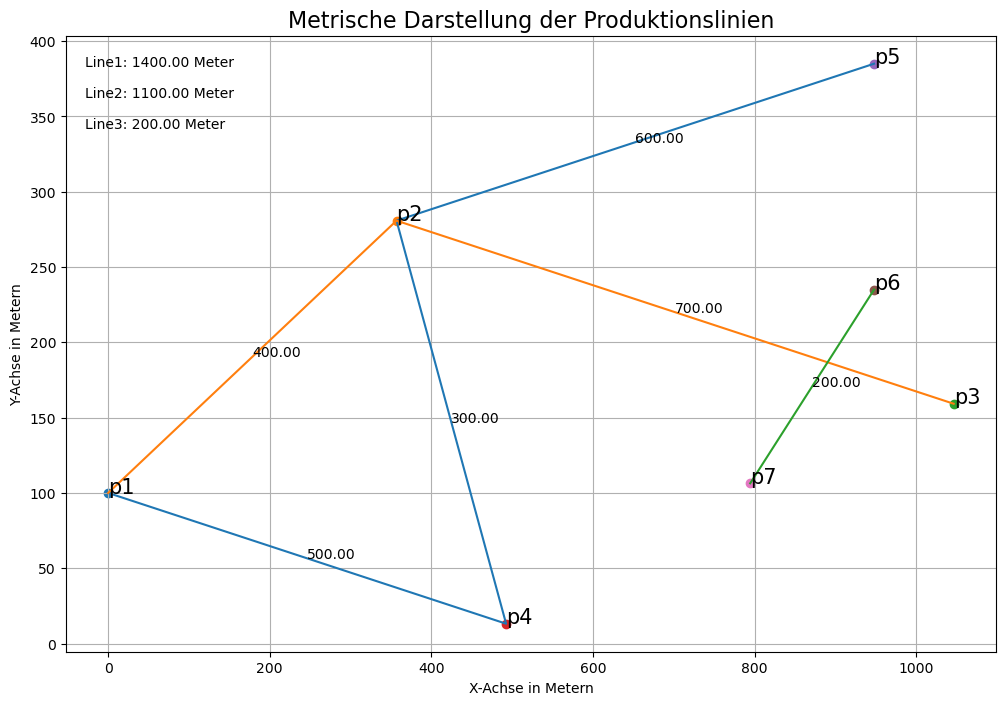

In [4]:
# Draw the points and routes
plt.figure(figsize=(12,8))
for point, coords in points.items():
    plt.scatter(*coords, label=point)
    plt.text(coords[0], coords[1], point, fontsize=15)  
for line, route in production_lines.items():
    route_coords = [points[point] for point in route]
    plt.plot(*zip(*route_coords), label=line)

    # Calculate the total distance for the line
    total_distance = sum(calculate_distance(route_coords[i], route_coords[i+1]) for i in range(len(route_coords)-1))

    # Add the total distance to the legend
    plt.text(0.02, 0.95 - 0.05*list(production_lines.keys()).index(line), f'{line}: {total_distance:.2f} Meter',
             transform=plt.gca().transAxes)

    # Annotate distances between points
    for i in range(len(route_coords)-1):
        point1 = route_coords[i]
        point2 = route_coords[i+1]
        distance = calculate_distance(point1, point2)
        middle_point = ((point1[0] + point2[0])/2, (point1[1] + point2[1])/2)
        plt.annotate(f'{distance:.2f}', middle_point)

plt.grid(True)
plt.title("Metrische Darstellung der Produktionslinien", fontsize=16, color='black')
plt.xlabel("X-Achse in Metern")
plt.ylabel("Y-Achse in Metern")

plt.show()


# Class: Define forklift

In [5]:
class Forklift:
    '''
    The Forklift class simulates a forklift moving along a route, considering its acceleration.
    '''
    def __init__(self, route, speed, wait_time, acceleration):
        self.route = route
        self.max_speed = speed
        self.wait_time = wait_time
        self.acceleration = acceleration
        self.current_location = route[0]
        self.current_target_index = 1
        self.current_target = route[self.current_target_index]
        self.waiting_time = 0
        self.current_speed = 0  # The forklift starts from rest

    def step(self):
        if self.waiting_time > 0:
            self.waiting_time -= 1
            self.current_speed = 0  # The forklift stops when it's waiting
            return self.current_location

        # Calculate the direction to the current target
        direction = [self.current_target[i] - self.current_location[i] for i in range(2)]
        distance = math.sqrt(sum([i**2 for i in direction]))

        # If we are close enough to the target, move to the next target
        if distance <= self.current_speed:
            self.current_location = self.current_target
            self.current_target_index = (self.current_target_index + 1) % len(self.route)
            self.current_target = self.route[self.current_target_index]
            self.waiting_time = self.wait_time
        else:
            # Otherwise, move towards the target
            step = [self.current_speed * i / distance for i in direction]
            self.current_location = [self.current_location[i] + step[i] for i in range(2)]

        # Update speed for the next step
        if self.current_speed < self.max_speed:
            self.current_speed = min(self.current_speed + self.acceleration, self.max_speed)

        return self.current_location


# Function: Forklift simulation 

In [6]:
# Simulate the forklifts
def simulate_day(time, speed, waiting_time, safety_distance, acceleration):
    # Define the forklifts here or pass them as a parameter
    forklifts = []
    for i, line in enumerate(production_lines.values()):
        route = [points[p] for p in line]
        if isinstance(speed, pd.Series):
            speed_i = speed[i]  # use speed from dataframe if speed is a row
        else:
            speed_i = speed  # use global speed otherwise
        forklifts.append(Forklift(route, speed_i, waiting_time, acceleration)) 

    for t in range(time):  # Simulate for a specific time range
        locations = []
        for i, forklift in enumerate(forklifts):
            location = forklift.step()
            locations.append(location)

        # Check for collisions
        for i in range(len(locations)):
            for j in range(i+1, len(locations)):
                if calculate_distance(locations[i], locations[j]) < safety_distance:
                    return t  # return the current time if a collision is detected

    # If no collision was detected, return the total time
    return time


### Create grid with all possible speed combinations

In [7]:
# Create a list with the range
speeds = np.arange(1, 3.1, 0.1).tolist()

# Use itertools.product to create combinations of speeds for each line
index = pd.MultiIndex.from_tuples(itertools.product(speeds, repeat=3), names=['Line1', 'Line2', 'Line3'])

# Create dataframe using multi-index
df_simulation_speed = pd.DataFrame(index=index).reset_index()
df_simulation_speed['combined_speed'] = df_simulation_speed[['Line1', 'Line2', 'Line3']].sum(axis=1)

# Minimum value of combined speed to reduce test cases
df_simulation_speed = df_simulation_speed[df_simulation_speed['combined_speed'] >= 6]
print(df_simulation_speed)

      Line1  Line2  Line3  combined_speed
230     1.0    2.0    3.0             6.0
250     1.0    2.1    2.9             6.0
251     1.0    2.1    3.0             6.1
270     1.0    2.2    2.8             6.0
271     1.0    2.2    2.9             6.1
...     ...    ...    ...             ...
9256    3.0    3.0    2.6             8.6
9257    3.0    3.0    2.7             8.7
9258    3.0    3.0    2.8             8.8
9259    3.0    3.0    2.9             8.9
9260    3.0    3.0    3.0             9.0

[4796 rows x 4 columns]


In [8]:
# Define grid of parameters
time_seconds = 60*60*24 # Here 24 hours

df_simulation_speed['time_to_collision'] = [simulate_day(time=time_seconds, 
                                                         speed=row,
                                                         waiting_time=120, 
                                                         safety_distance=2,
                                                         acceleration = 1) # 1m/s acceleration 
                                            for _, row in df_simulation_speed.iterrows()]

print(df_simulation_speed)

      Line1  Line2  Line3  combined_speed  time_to_collision
230     1.0    2.0    3.0             6.0               8720
250     1.0    2.1    2.9             6.0              20092
251     1.0    2.1    3.0             6.1               5338
270     1.0    2.2    2.8             6.0              11385
271     1.0    2.2    2.9             6.1              11385
...     ...    ...    ...             ...                ...
9256    3.0    3.0    2.6             8.6               3742
9257    3.0    3.0    2.7             8.7               3742
9258    3.0    3.0    2.8             8.8               3742
9259    3.0    3.0    2.9             8.9               3742
9260    3.0    3.0    3.0             9.0               3742

[4796 rows x 5 columns]


In [9]:
relevant_combinations = df_simulation_speed[df_simulation_speed['time_to_collision'] == time_seconds]
print(relevant_combinations)

      Line1  Line2  Line3  combined_speed  time_to_collision
4714    2.0    2.4    2.0             6.4              86400
4721    2.0    2.4    2.7             7.1              86400
8020    2.8    1.3    2.9             7.0              86400


In [10]:
print(relevant_combinations.loc[relevant_combinations['combined_speed'].idxmax()])

Line1                    2.0
Line2                    2.4
Line3                    2.7
combined_speed           7.1
time_to_collision    86400.0
Name: 4721, dtype: float64
